**BASADO EN : https://www.kaggle.com/code/rishpande/pima-indians-diabetes-beginner/notebook **


# PIMA Indians Diabetes


## CONTEXTO

**Diabetes**, es un grupo de trastornos metabólicos en los que hay niveles elevados de azúcar en la sangre durante un período prolongado. Los síntomas de niveles altos de azúcar en la sangre incluyen micción frecuente, aumento de la sed y aumento del hambre. Si no se trata, la diabetes puede causar muchas complicaciones. Las complicaciones agudas pueden incluir cetoacidosis diabética, estado hiperglucémico hiperosmolar o muerte. Las complicaciones graves a largo plazo incluyen enfermedad cardiovascular, accidente cerebrovascular, enfermedad renal crónica, úlceras en los pies y daños en los ojos.
.

Este **dataset** es originario del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de manera diagnóstica si un paciente tiene o no diabetes, en función de ciertas medidas de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena pima.

## Objetivo

Construiremos un modelo de aprendizaje automático para predecir con precisión si los pacientes en el conjunto de datos tienen diabetes o no.

## Data


Los conjuntos de datos consisten en varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)




In [1]:
!pip install plotly==3.10.0
from chart_studio import plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.


In [3]:
df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualización de datos

****
**EJERCICIO:** a partir del siguiente gráfico identifique que tipo de modelo de clasificación podemos aplicar.
****

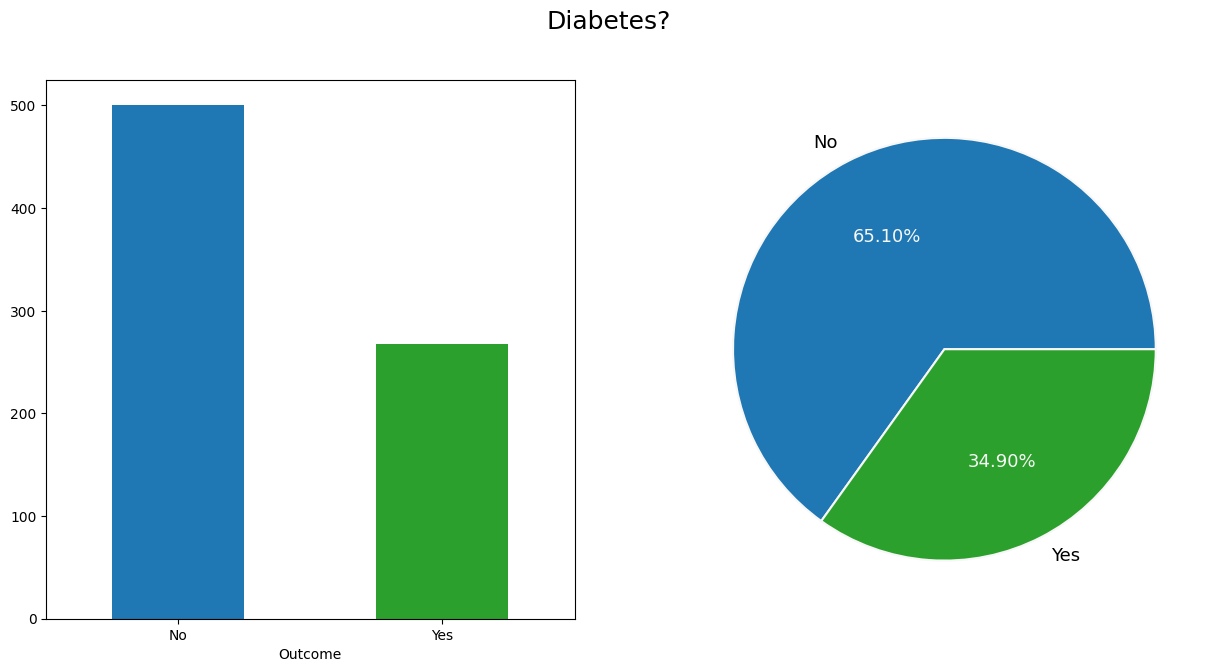

In [6]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

##**Apuntes**

- antes se separan en train( ) y test .

equilibrar balancear las clases: smoth, oversampling, undersampling

el modelo no aprende bien (overfitting), con el desbalanceo.


-----------------------------------------------------------

precision: FN


se cambia la tasa de corte para eliminar los FN y dejar los Fpositivos en el caso de camion mineria. se sube recall o baja precision .


la tasa de corte se calcula con y_pred , y_prob
------------------------------------------------------------




## Distribución


****
**EJERCICIO:** a partir de los siguientes gráficos, ¿qué puedes comentar del tipo de distribución de los datos?
****

<ipython-input-7-6d6a1f9e471e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-7-6d6a1f9e471e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-7-6d6a1f9e471e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

<Axes: xlabel='BMI', ylabel='Density'>

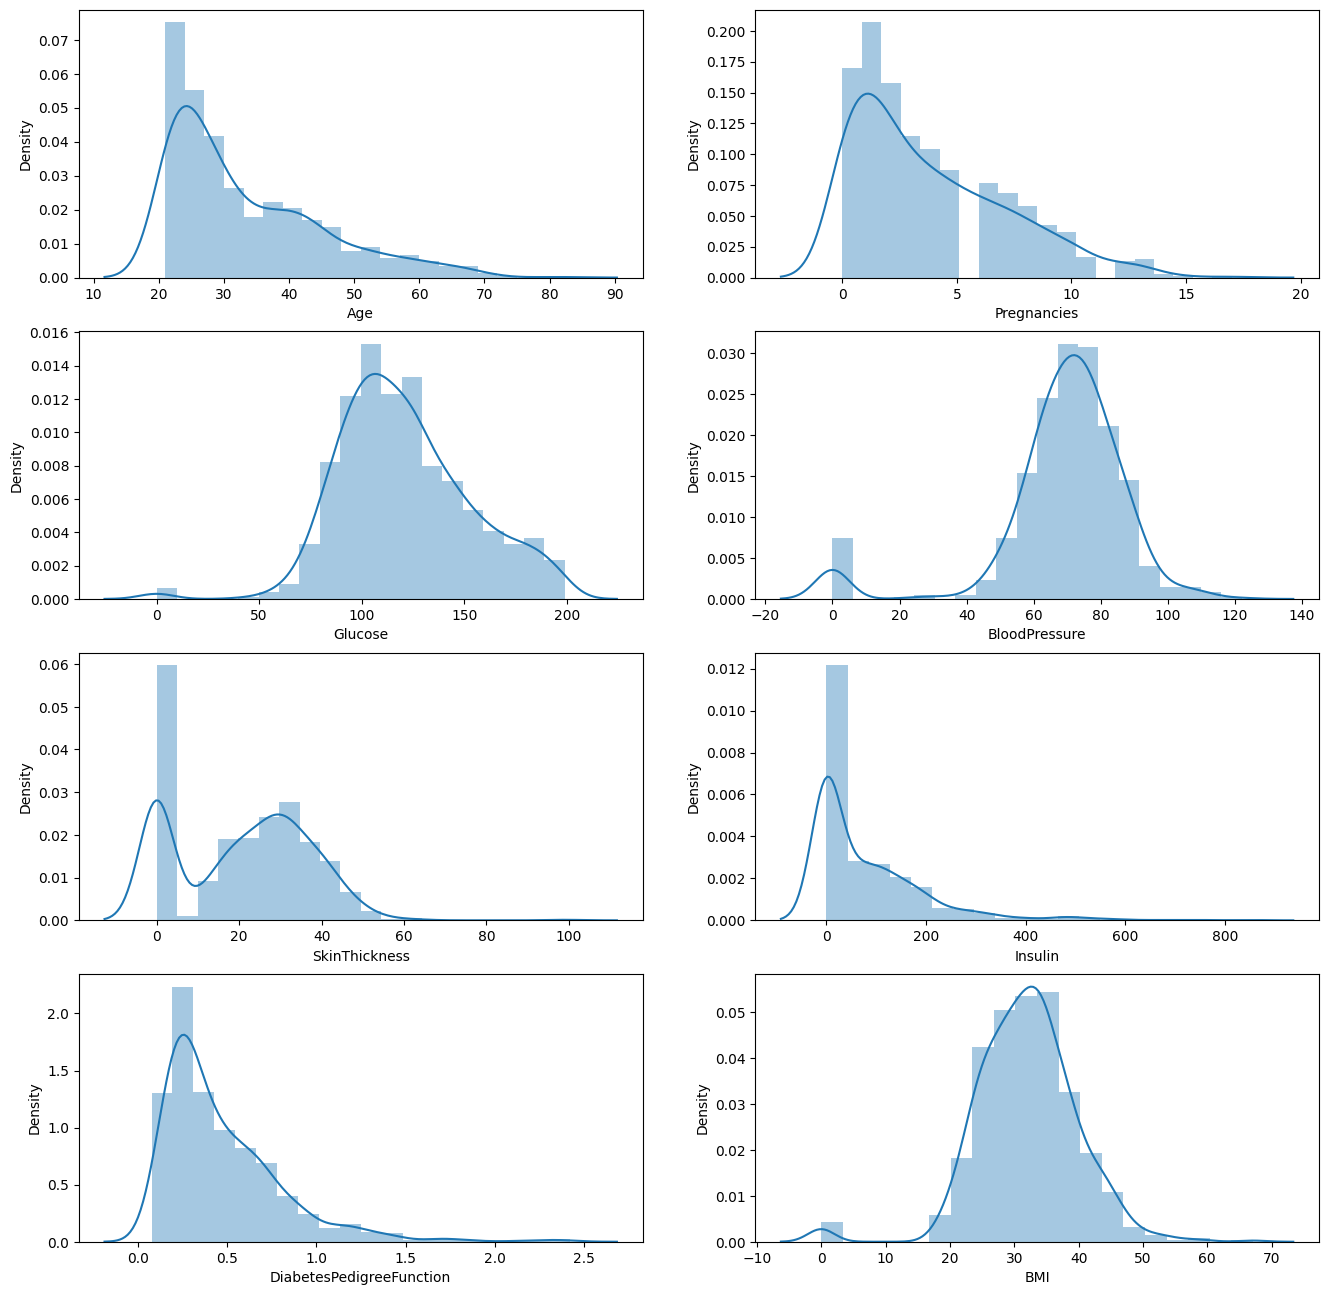

In [7]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

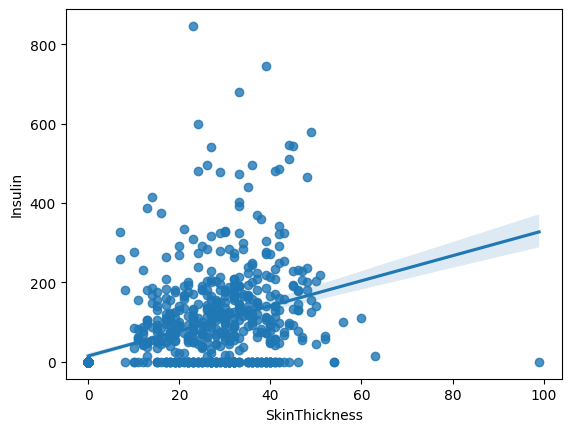

In [8]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=df)

## Correlación



****
**EJERCICIO:** a partir de los siguientes gráficos, ¿qué puedes comentar de la correlación entre variables?.
****

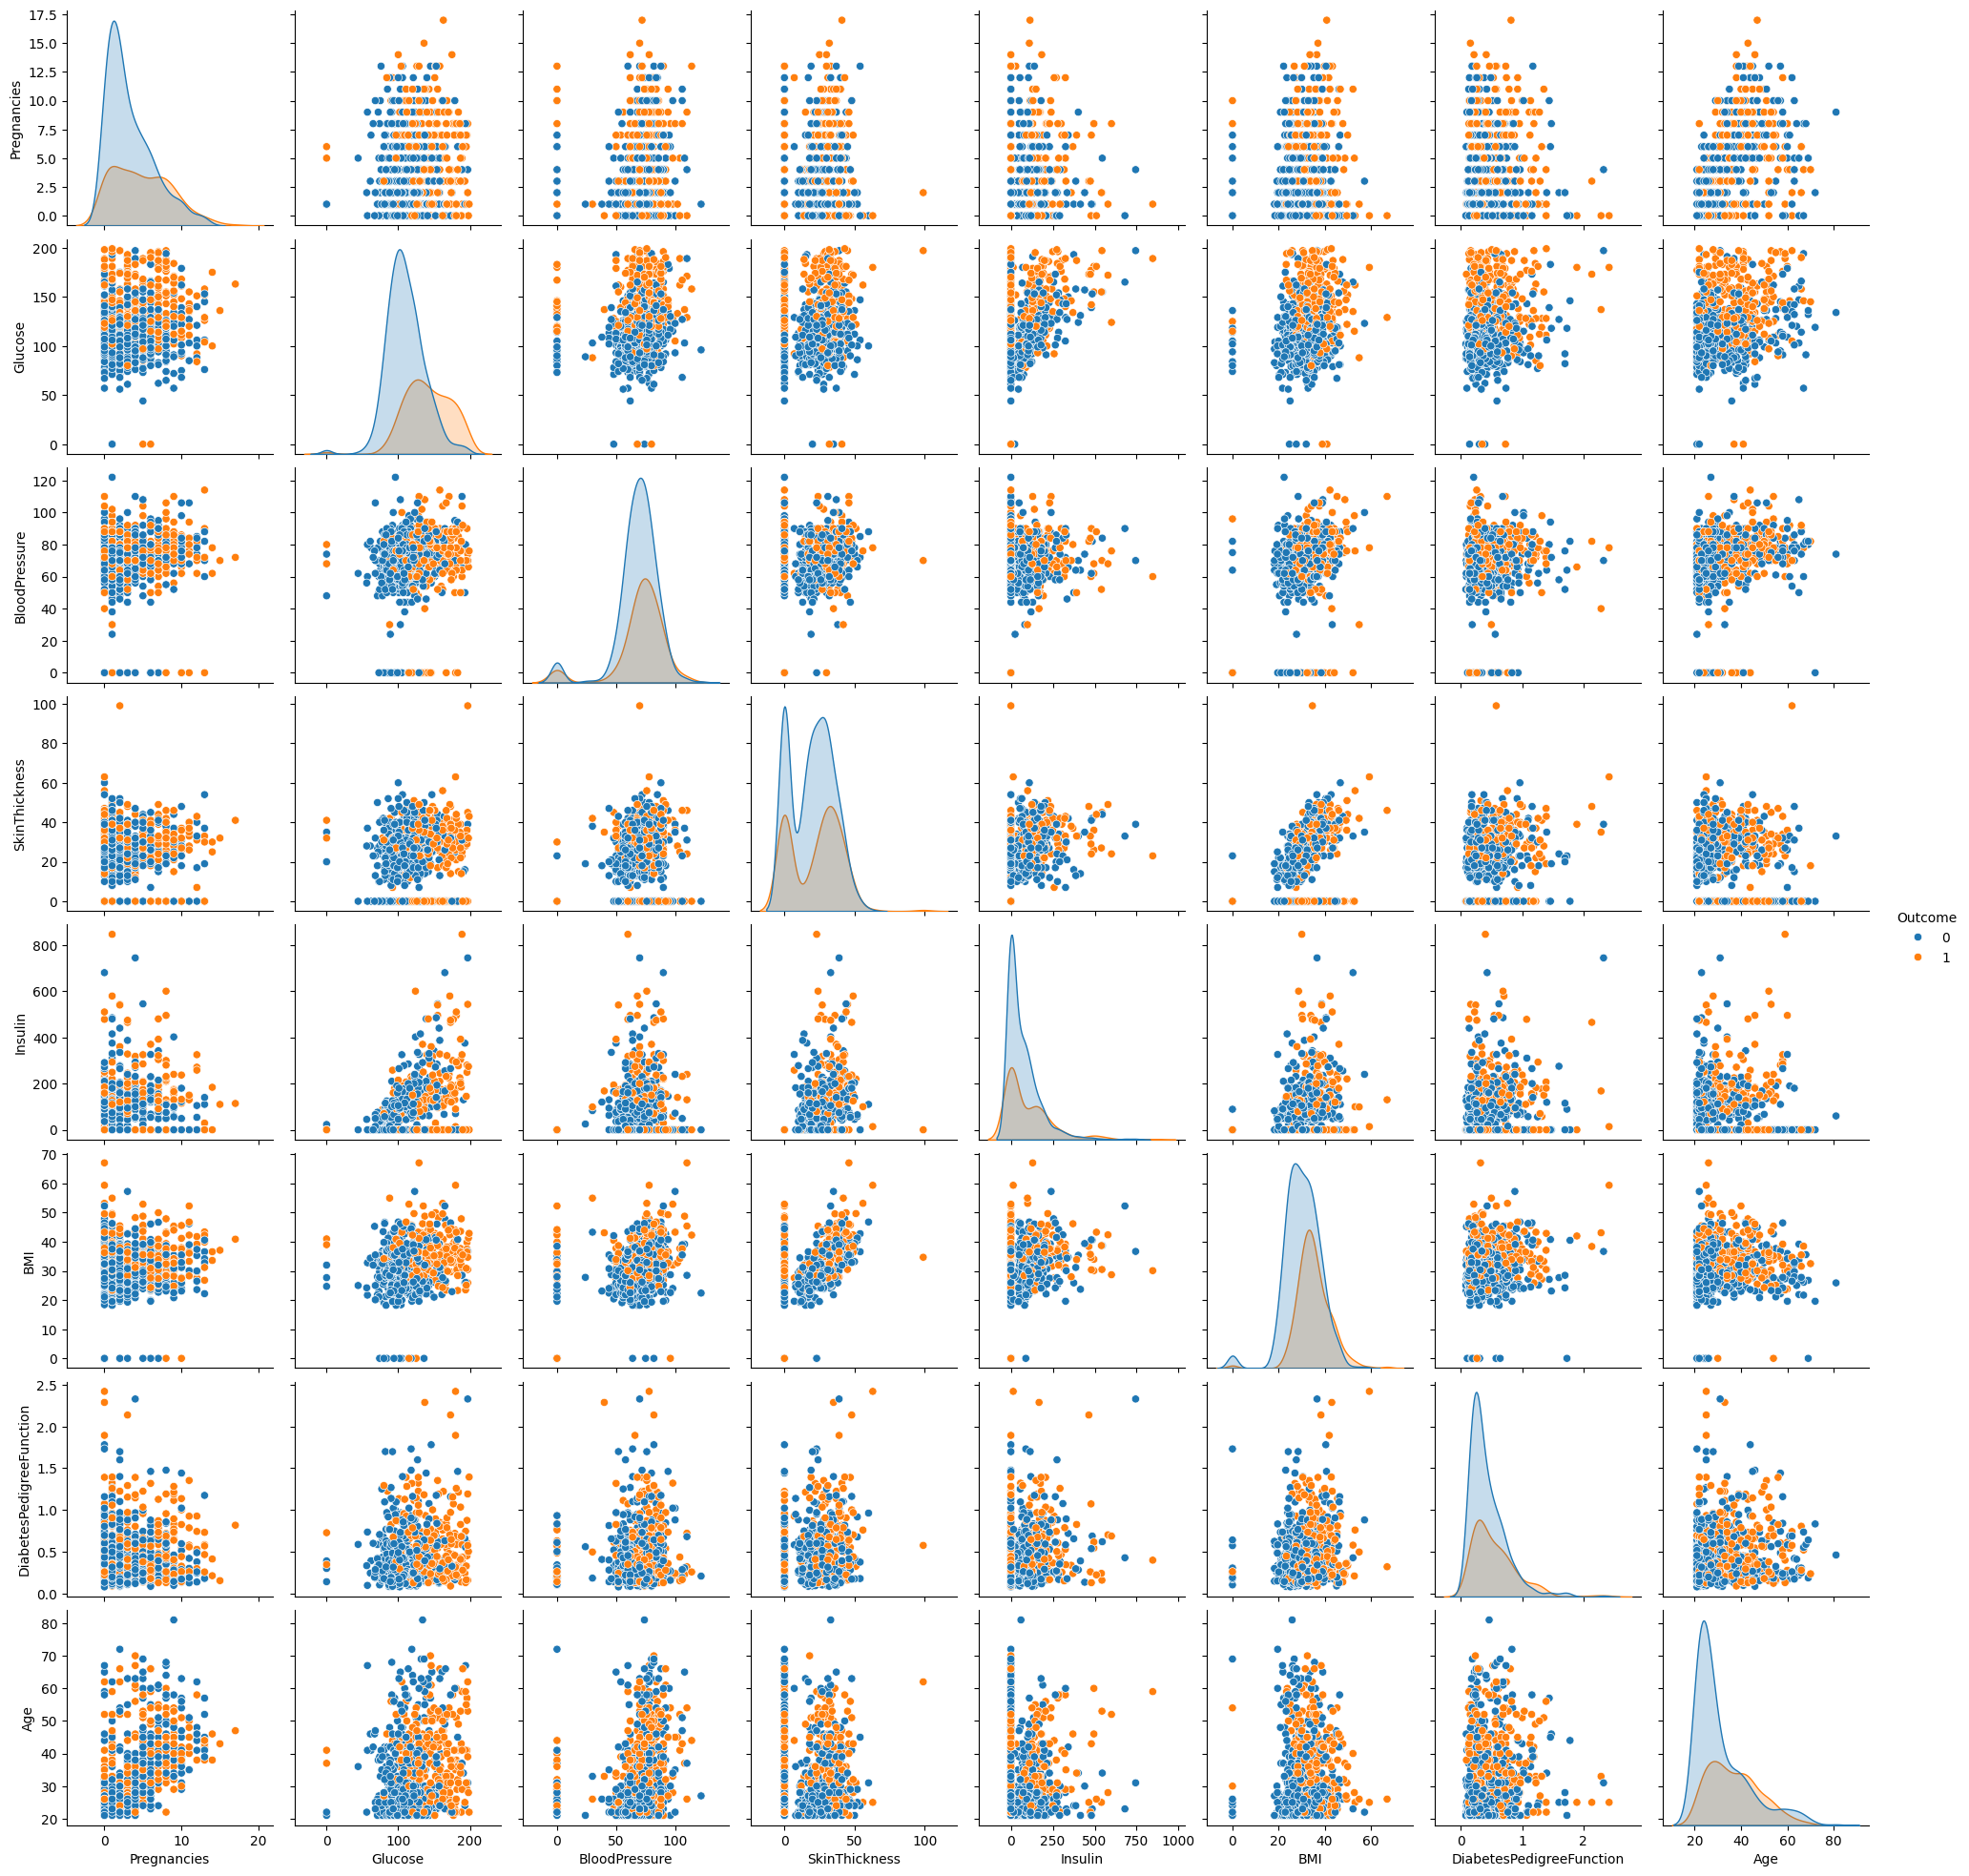

In [9]:
sns.pairplot(data=df,hue='Outcome')

## Gráficos de Violín



****
**EJERCICIO:** comenta los siguientes gráficos ¿qué muestran? ¿puedes identificar medidas de tendencia central?.
****

<ipython-input-10-4fbe34e666d0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4fbe34e666d0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4fbe34e666d0>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4fbe34e666d0>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-10-4fbe34e666d0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

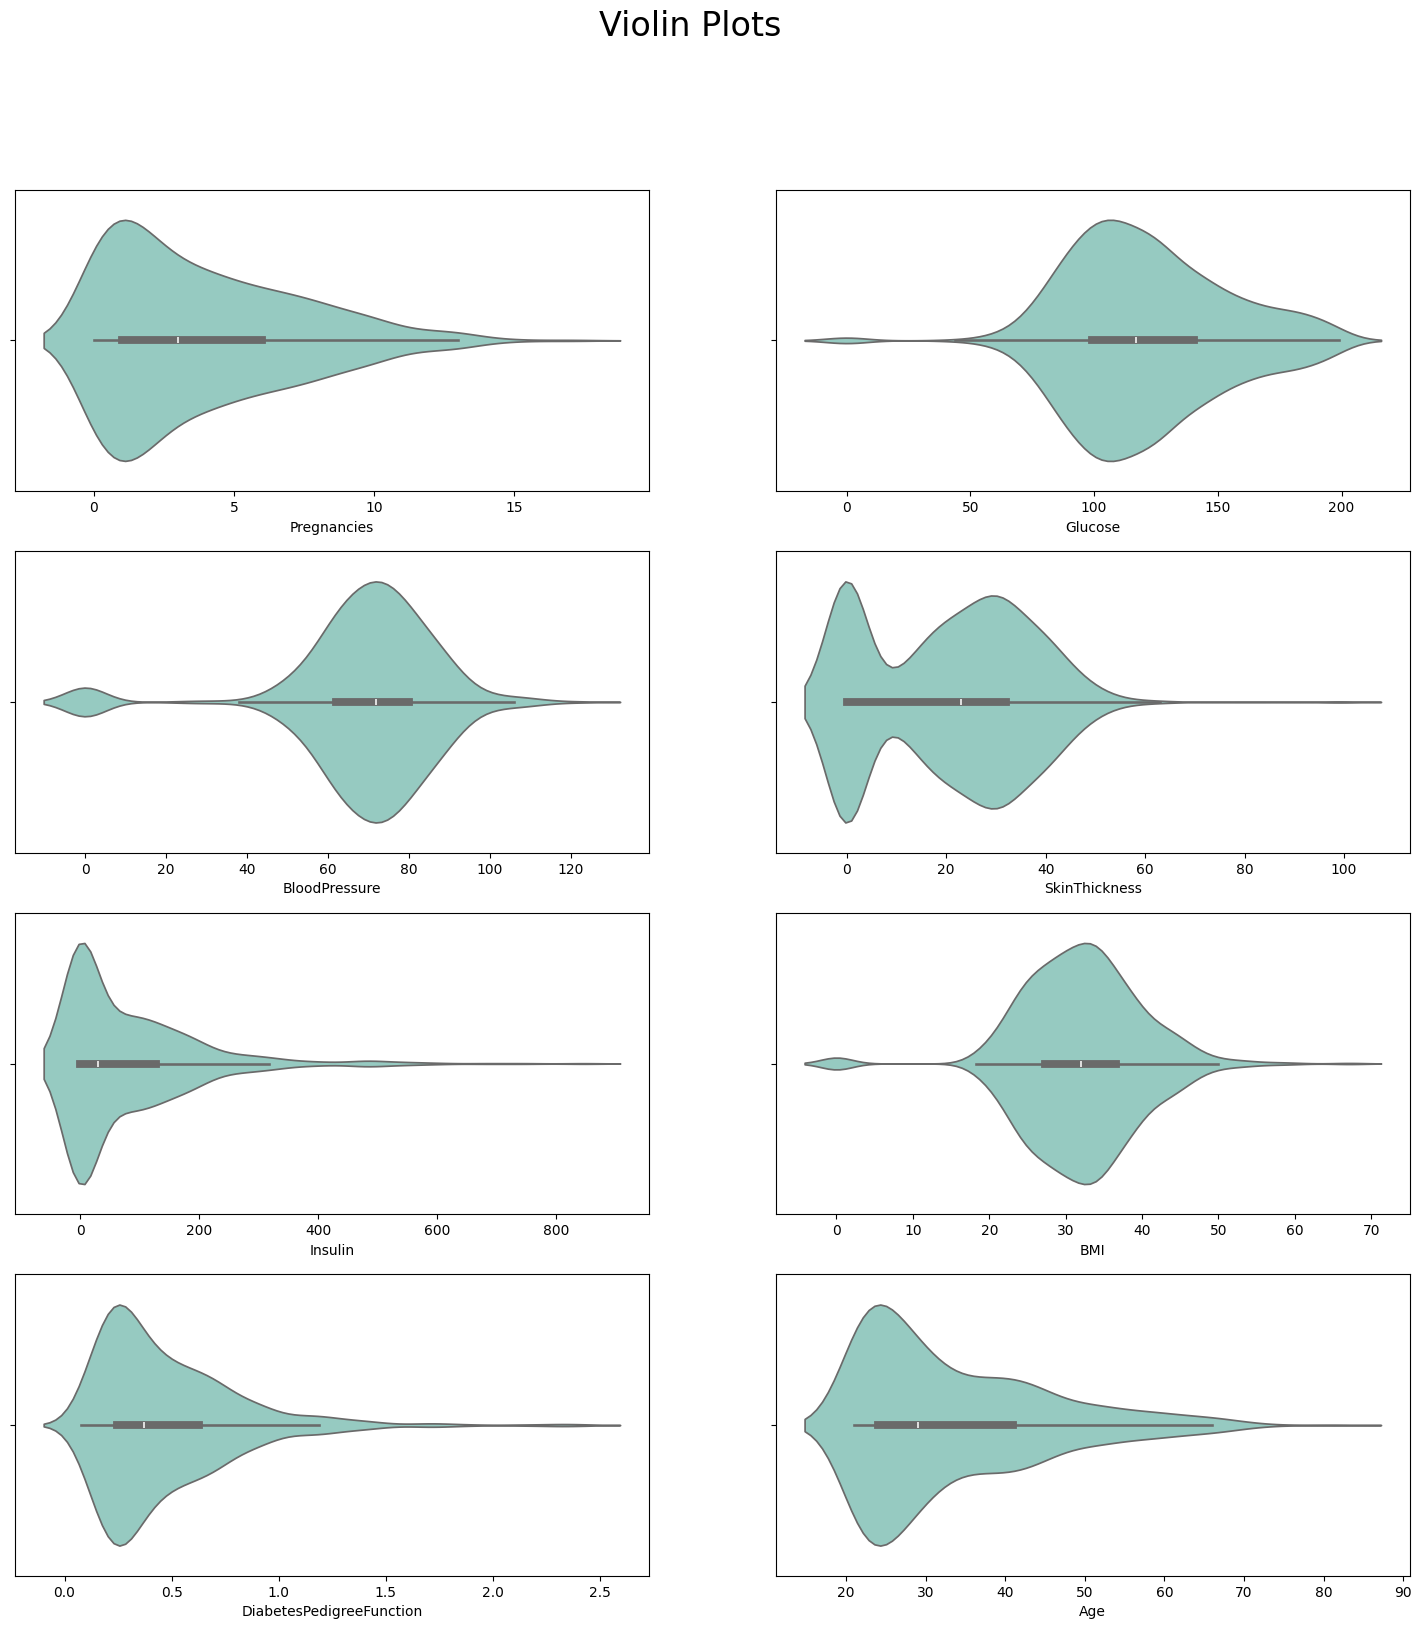

In [10]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=df,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=df, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=df, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=df, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=df, ax=ax[3,1],palette='Set3')
plt.show()


## Correlación entre características

****
**EJERCICIO:** comenta el siguiente mapa ¿qué correlaciones positivas existen? ¿cuáles son negativas?.
****

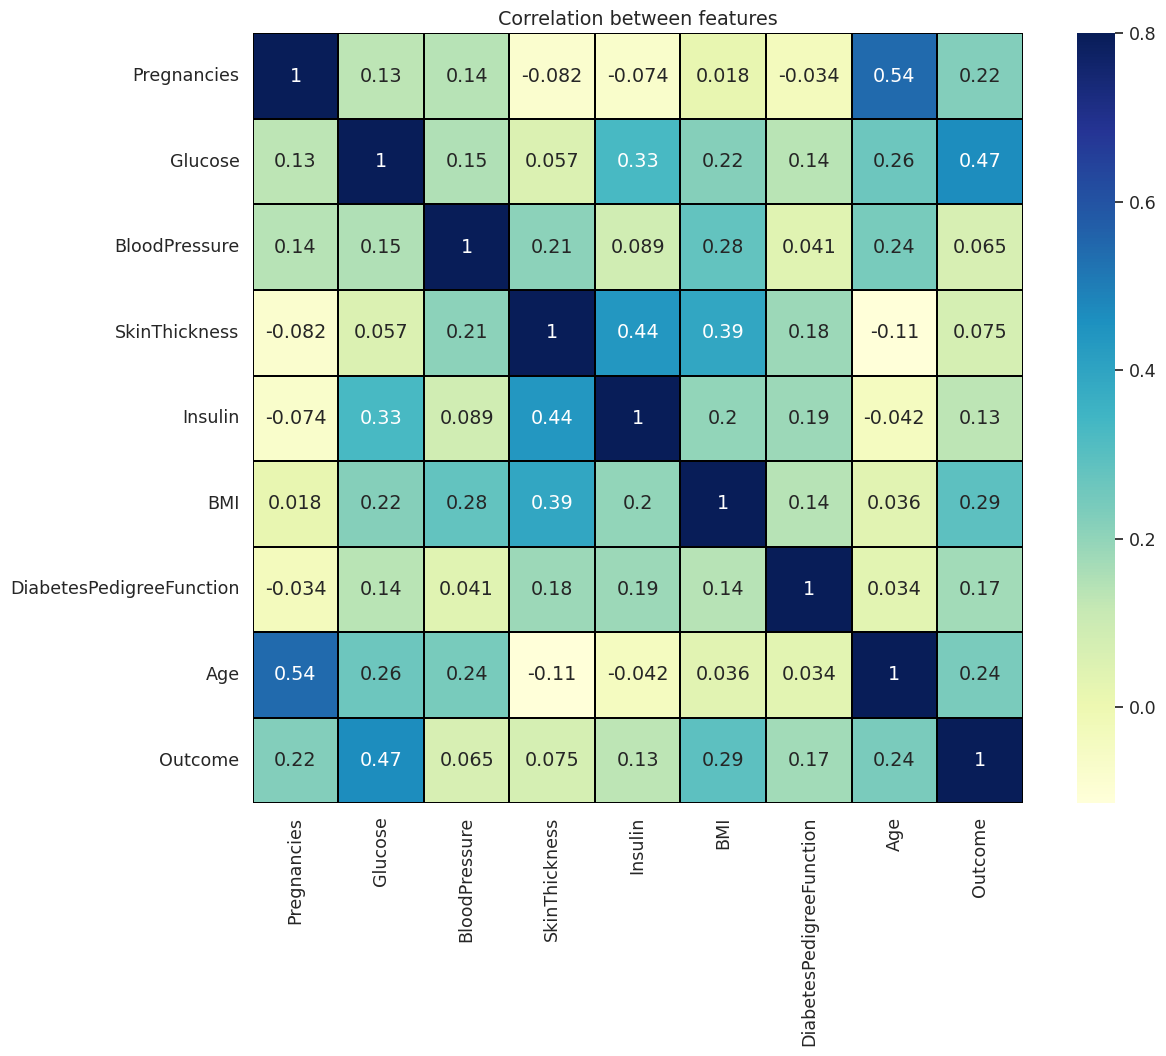

In [11]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

evitar la colinealidad, variables que tiene correlacion alta,

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

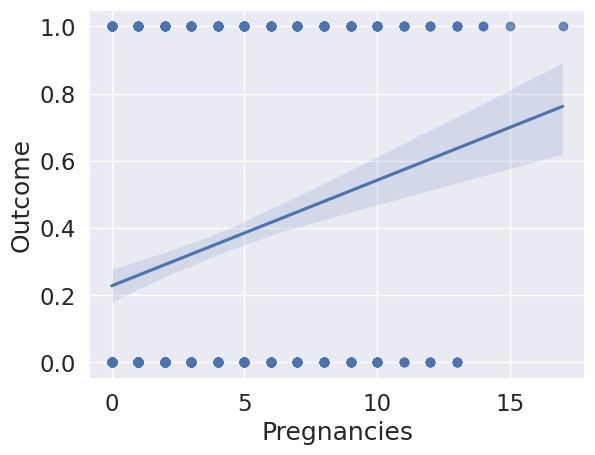

In [22]:
sns.regplot(x='Pregnancies', y ='Outcome', data=df)


<Axes: xlabel='Age', ylabel='Outcome'>

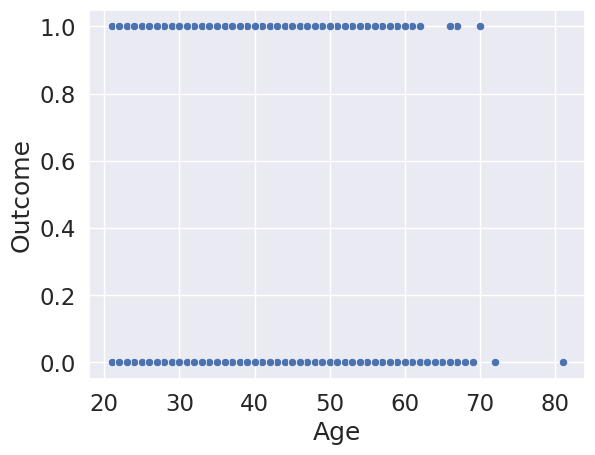

In [19]:
sns.scatterplot(x='Age', y ='Outcome', data=df)

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

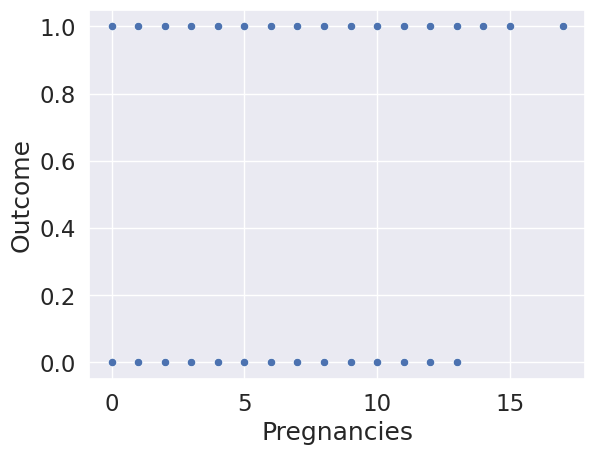

In [20]:
sns.scatterplot(x='Pregnancies', y ='Outcome', data=df)

# Modelo predictivo

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression



****
**EJERCICIO:** identifica las etiquetas o clases que serán predichas por el modelo.
****

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



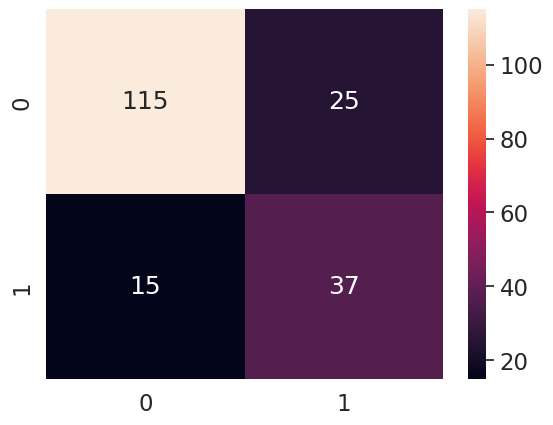



ACCURACY  79.16666666666666


In [13]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)



#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()
#Accuracy
print()
print()
print("ACCURACY ", LR.score(X_test, y_test)*100)

****
**EJERCICIO:** comenta si este es un buen modelo, justifica. ¿Cómo está el balance de clases? ¿afecta al modelo?
****